In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
# re-size all the images 
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train'
test_path = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test'

In [3]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
 # useful for getting number of output classes
folders = glob('/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train/*')

In [6]:
# our layers 
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)


In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1656 images belonging to 6 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 6 classes.


In [14]:
# fit the model

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
52/52 [==============================] - 20s 383ms/step - loss: 1.5077 - accuracy: 0.4016 - val_loss: 1.2260 - val_accuracy: 0.4861
Epoch 2/10
52/52 [==============================] - 21s 406ms/step - loss: 1.2306 - accuracy: 0.5278 - val_loss: 1.0462 - val_accuracy: 0.7222
Epoch 3/10
52/52 [==============================] - 19s 362ms/step - loss: 1.1765 - accuracy: 0.5441 - val_loss: 0.9965 - val_accuracy: 0.6111
Epoch 4/10
52/52 [==============================] - 21s 404ms/step - loss: 1.0339 - accuracy: 0.6171 - val_loss: 0.8914 - val_accuracy: 0.6250
Epoch 5/10
52/52 [==============================] - 21s 394ms/step - loss: 0.9849 - accuracy: 0.6401 - val_loss: 0.7684 - val_accuracy: 0.7222
Epoch 6/10
52/52 [==============================] - 21s 404ms/step - loss: 1.5218 - accuracy: 0.4921 - val_loss: 1.1372 - val_accuracy: 0.5278
Epoch 7/10
52/52 [==============================] - 20s 386ms/step - loss: 1.0710 - accuracy: 0.6208 - val_loss: 1.0309 - val_accuracy: 0.5972

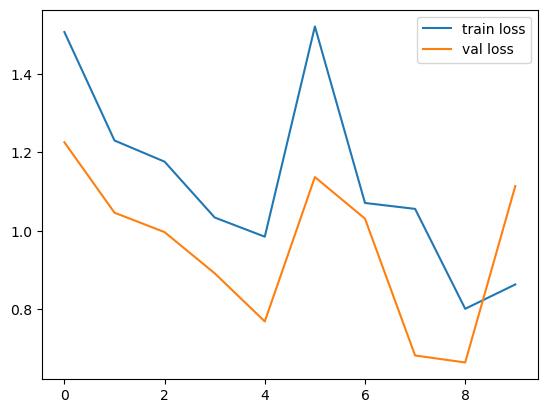

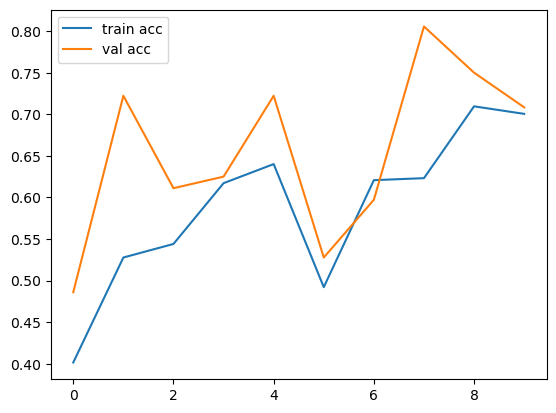

<Figure size 640x480 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')